In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Data Importation

In [2]:
loan = pd.read_csv("loan_data.csv")
loan.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


# Data Inspection

In [3]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loan.select_dtypes(include = [np.number]).describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [5]:
loan.select_dtypes(include = [np.object]).describe().T

,count,unique,top,freq
purpose,9578,7,debt_consolidation,3957


# Exploratory Data Analysis (EDA)

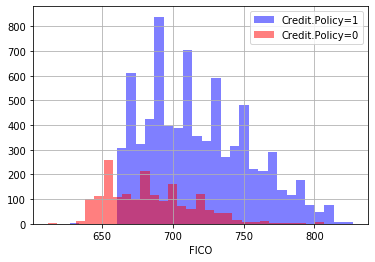

In [7]:
loan[loan['credit.policy'] == 1]['fico'].hist(alpha = 0.5, color = 'blue', bins = 30, label = 'Credit.Policy=1')
loan[loan['credit.policy'] == 0]['fico'].hist(alpha = 0.5,color = 'red', bins = 30, label = 'Credit.Policy=0')

plt.legend()
plt.xlabel('FICO')
plt.show()

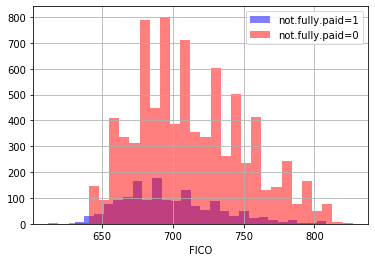

In [8]:
loan[loan['not.fully.paid'] == 1]['fico'].hist(alpha = 0.5,color = 'blue', bins = 30, label = 'not.fully.paid=1')
loan[loan['not.fully.paid'] == 0]['fico'].hist(alpha = 0.5,color = 'red', bins = 30, label = 'not.fully.paid=0')

plt.legend()
plt.xlabel('FICO')
plt.show()

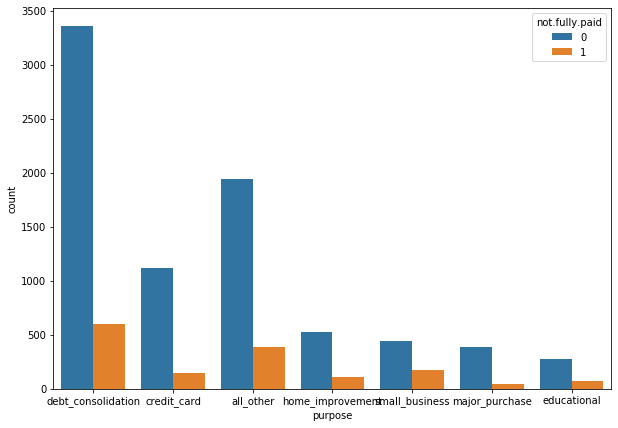

In [10]:
plt.figure(figsize = (10, 7))
sns.countplot(x = loan['purpose'], hue = 'not.fully.paid', data = loan)
plt.show()

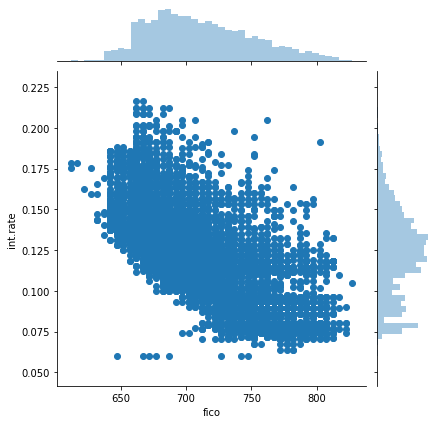

In [12]:
sns.jointplot(x = loan['fico'], y = loan['int.rate'], data = loan)
plt.show()

<Figure size 720x504 with 0 Axes>

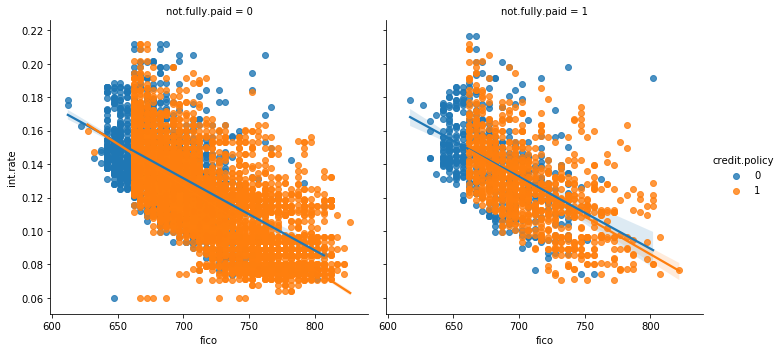

In [15]:
plt.figure(figsize=(10,7))

sns.lmplot(x = 'fico', y = 'int.rate', data = loan, hue = 'credit.policy', col = 'not.fully.paid')

plt.show()

# Data Processing

In [21]:
dummy_cols = pd.get_dummies(loan.purpose, drop_first = True, prefix = 'PURPOSE')

loan_copy = pd.concat([loan, dummy_cols], axis = 1).drop('purpose', axis = 1)

loan_copy.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,PURPOSE_credit_card,PURPOSE_debt_consolidation,PURPOSE_educational,PURPOSE_home_improvement,PURPOSE_major_purchase,PURPOSE_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Predictive modelling

In [27]:
def ensemble_model(X, y, test_size = None, random_state = None, dt = False, rf = False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state) # splitting dataset

    if dt:
        model = DecisionTreeClassifier()
    elif rf:
        model = RandomForestClassifier(n_estimators=600)
    
    model.fit(X_train, y_train) # fit model
    
    train_pred = model.predict(X_train)
    y_pred = model.predict(X_test) # make predictions
    
    print(f'Model accuracy score on train dataset: {accuracy_score(y_train, train_pred)}')
    print(f'Model accuracy score on test dataset: {accuracy_score(y_test, y_pred)}')
    print()
    
    print('********************Classification Report********************')
    print(classification_report(y_train, train_pred))
    print()
    
    print('********************Confusion Matrix********************')
    print(confusion_matrix(y_train, train_pred))
    print()

    print('**************Predictions************************')
    result = pd.DataFrame({'Actual_Target': y_test.ravel(), 'Predicted_Target': y_pred.ravel()})

    return result

In [28]:
#setting training and test attributes
X = loan_copy.drop('not.fully.paid', axis = 1) 
y = loan_copy['not.fully.paid']

result = ensemble_model(X, y, test_size = 0.3, random_state = 101, dt = True)

print(result.head())

Model accuracy score on train dataset: 1.0
Model accuracy score on test dataset: 0.7341684064022269

********************Classification Report********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5614
           1       1.00      1.00      1.00      1090

    accuracy                           1.00      6704
   macro avg       1.00      1.00      1.00      6704
weighted avg       1.00      1.00      1.00      6704


********************Confusion Matrix********************
[[5614    0]
 [   0 1090]]

**************Predictions************************
   Actual_Target  Predicted_Target
0              0                 0
1              0                 1
2              0                 0
3              0                 1
4              0                 0


In [29]:
#setting training and test attributes
X = loan_copy.drop('not.fully.paid', axis = 1) 
y = loan_copy['not.fully.paid']

result = ensemble_model(X, y, test_size = 0.3, random_state = 101, rf = True)

print(result.head())

Model accuracy score on train dataset: 1.0
Model accuracy score on test dataset: 0.8465553235908142

********************Classification Report********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5614
           1       1.00      1.00      1.00      1090

    accuracy                           1.00      6704
   macro avg       1.00      1.00      1.00      6704
weighted avg       1.00      1.00      1.00      6704


********************Confusion Matrix********************
[[5614    0]
 [   0 1090]]

**************Predictions************************
   Actual_Target  Predicted_Target
0              0                 0
1              0                 0
2              0                 0
3              0                 0
4              0                 0
